In [2]:
import pandas as pd
T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\foot_1league_2013_2018.csv')
T.head()

,Date,DOM,EXT,BDOM,BEXT
0,17/08/13,Arsenal,Aston Villa,1.0,3.0
1,17/08/13,Liverpool,Stoke,1.0,0.0
2,17/08/13,Norwich,Everton,2.0,2.0
3,17/08/13,Sunderland,Fulham,0.0,1.0
4,17/08/13,Swansea,Man United,1.0,4.0


In [3]:
len(T)

2281

In [16]:
pd.crosstab(T['BDOM'], T['BEXT'],
            margins = True,
            normalize = False)


BEXT,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
BDOM,,,,,,,,,
0.0,171,173,96,67,26,5,2,0,540
1.0,230,221,156,70,30,8,1,1,717
2.0,204,171,119,44,8,2,1,0,549
3.0,96,112,48,21,5,1,2,0,285
4.0,50,46,21,10,0,1,0,0,128
5.0,20,16,1,3,2,0,0,0,42
6.0,5,7,2,2,0,0,0,0,16
7.0,1,0,1,0,0,0,0,0,2
8.0,1,0,0,0,0,0,0,0,1


In [18]:
P=pd.crosstab(T['BDOM'], T['BEXT'],
            margins = True,
            normalize = True)
P.round(3)

BEXT,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
BDOM,,,,,,,,,
0.0,0.075,0.076,0.042,0.029,0.011,0.002,0.001,0.0,0.237
1.0,0.101,0.097,0.068,0.031,0.013,0.004,0.000,0.0,0.314
2.0,0.089,0.075,0.052,0.019,0.004,0.001,0.000,0.0,0.241
3.0,0.042,0.049,0.021,0.009,0.002,0.000,0.001,0.0,0.125
4.0,0.022,0.020,0.009,0.004,0.000,0.000,0.000,0.0,0.056
5.0,0.009,0.007,0.000,0.001,0.001,0.000,0.000,0.0,0.018
6.0,0.002,0.003,0.001,0.001,0.000,0.000,0.000,0.0,0.007
7.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.001
8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000


In [23]:
# Initialize EX and EY to 0
EX = 0
EY = 0



In [24]:
# Calculate EX
for k in range(9):
    EX += k * P.loc[k, 'All']
EX

1.539473684210526

In [25]:
# Calculate EY
for k in range(8):
    EY += k * P.loc['All', k]
EY

1.1828947368421052

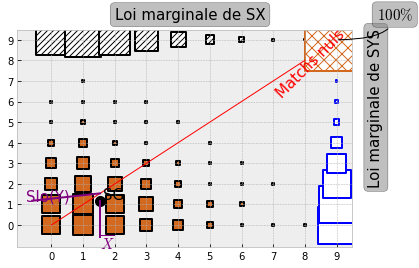

In [36]:
# Import and configure the pylab module
import pylab as pl
pl.style.use('bmh')

# Plot the squares
pl.plot([0,8], [0,8], color = 'red', linewidth = 1)
pl.plot(EX, EY, 'o', color = 'black', markersize = 10)
pl.xticks(range(10))
pl.yticks(range(10))

# Scatter plot for the squares
for i in range(8):
    for j in range(9):
        pl.scatter(j, i, marker='s', facecolor='chocolate', edgecolor='black', s=4000 * P.loc[j, i], linewidth=2)

# Scatter plot for the last row of squares
for k in range(9):
    pl.scatter(k, 9, marker='s', facecolor='white', color='black', hatch='////', s=4000 * P.loc[k, 'All'], linewidth=2)

# Scatter plot for the last column of squares
for k in range(8):
    pl.scatter(9, k, marker='s', facecolor='white', color='blue', hatch='', s=4000 * P.loc['All', k], linewidth=2)
    
pl.scatter(9, 9, marker='s', facecolor='white', color='chocolate', hatch='xx', s=4000, linewidth=2)

bbox_props = dict(boxstyle='round', pad=0.3, fc='gray', alpha=0.5, ec='black')

pl.text(x=2, y=10, s=r'Loi marginale de SX', fontsize=15, color='black', bbox=bbox_props)

pl.text(x=10, y=2, s=r"Loi marginale de SYS", fontsize=15, color='black', bbox=bbox_props, rotation=90)

pl.text(x=EX + 0.1, y=EY + 0.1, s=r'SG', fontsize=15, color='black')

pl.text(x=EX, y=-1.2, s=r'$\overline{X}$', fontsize=15, color='purple')

pl.plot([EX, EX], [-0.6, EY], color='purple', linewidth=2)

pl.text(x=-0.8, y=EY, s=r'Slo(Y)', fontsize=15, color='purple')

pl.text(x=7, y=6.2, s=r'Matchs nuls', fontsize=15, color='red', rotation=45)

pl.plot([-0.6, EX], [EY, EX], color='purple', linewidth=2)

pl.annotate(r'$100\%$', xy=(9, 9), xycoords='data', xytext=(40, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='-', color='black', connectionstyle='angle3', linewidth=1),
             fontsize=15,
             color='black',
             bbox=bbox_props)

pl.show()



In [52]:
EX2 = 0
for i in range(9):
    EX2 = EX2 + i ** 2 * P.loc[i, 'All']
EX2

4.0850877192982455

In [53]:
SX = (EX2 - EX ** 2) ** 0.5
SX

1.3096215082692841

In [54]:
EY2 = 0
for j in range(8):
    EY2 = EY2 + j ** 2 * P.loc['All', j]
EY2

2.76359649122807

In [55]:
SY = (EY2 - EY ** 2) ** 0.5
SY

1.1680567335447867

In [56]:
R = T.groupby(['BDOM', 'BEXT']).count()
R = R[['Date']]
R.reset_index(inplace=True)
R


,BDOM,BEXT,Date
0,0.0,0.0,171
1,0.0,1.0,173
2,0.0,2.0,96
3,0.0,3.0,67
4,0.0,4.0,26
5,0.0,5.0,5
6,0.0,6.0,2
7,1.0,0.0,230
8,1.0,1.0,221
9,1.0,2.0,156


In [57]:
R['Freq'] = R['Date'] / len(T)

In [58]:
R['X*Y'] = R['BDOM'] * R['BEXT']
R


,BDOM,BEXT,Date,Freq,X*Y
0,0.0,0.0,171,0.074967,0.0
1,0.0,1.0,173,0.075844,0.0
2,0.0,2.0,96,0.042087,0.0
3,0.0,3.0,67,0.029373,0.0
4,0.0,4.0,26,0.011399,0.0
5,0.0,5.0,5,0.002192,0.0
6,0.0,6.0,2,0.000877,0.0
7,1.0,0.0,230,0.100833,0.0
8,1.0,1.0,221,0.096887,1.0
9,1.0,2.0,156,0.068391,2.0


In [59]:
EXY = 0
for k in R.index:
    EXY = EXY + k * R.loc[k, 'Freq']
EXY



12.325295922840857

In [60]:
COV = EXY - EX * EY
COV

10.504260604281301

In [61]:
R['X+Y'] = R['BDOM'] + R['BEXT']
R.head()

,BDOM,BEXT,Date,Freq,X*Y,X+Y
0,0.0,0.0,171,0.074967,0.0,0.0
1,0.0,1.0,173,0.075844,0.0,1.0
2,0.0,2.0,96,0.042087,0.0,2.0
3,0.0,3.0,67,0.029373,0.0,3.0
4,0.0,4.0,26,0.011399,0.0,4.0


In [62]:
Somme = R.groupby('X+Y').sum()
Somme

,BDOM,BEXT,Date,Freq,X*Y
X+Y,,,,,
0.0,0.0,0.0,171,0.074967,0.0
1.0,1.0,1.0,403,0.176677,0.0
2.0,3.0,3.0,521,0.228409,1.0
3.0,6.0,6.0,490,0.214818,4.0
4.0,10.0,10.0,377,0.165278,10.0
5.0,15.0,15.0,193,0.084612,20.0
6.0,21.0,21.0,81,0.035511,35.0
7.0,28.0,21.0,27,0.011837,56.0
8.0,25.0,23.0,9,0.003946,61.0


In [66]:
Loi_somme = Somme['Freq']
Loi_somme.reset_index()

,X+Y,Freq
0,0.0,0.074967
1,1.0,0.176677
2,2.0,0.228409
3,3.0,0.214818
4,4.0,0.165278
5,5.0,0.084612
6,6.0,0.035511
7,7.0,0.011837
8,8.0,0.003946
9,9.0,0.003507
